In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt

import sys
from Bio import motifs
from Bio.Seq import Seq

from scipy.stats import pearsonr, spearmanr

In [2]:
snps = pd.read_csv('../../hyprcoloc_output_old/ForColoc/snpscores.txt.gz', sep='\t')
hyprcoloc = pd.read_csv('../../hyprcoloc_output_old/ForColoc/hyprcoloc.results.txt.gz', sep='\t')
colocalized = pd.read_csv('../../hyprcoloc_output_old/ForColoc/hyprcoloc.results.OnlyColocalized.Stats.txt.gz', sep='\t')

splicing_coloc_idx = colocalized.loc[
    [y == 'polyA.Splicing.Subset_YRI' for y in [x.split(';')[0] for x in colocalized.phenotype_full]]
].index

In [3]:
# def get_intron_SJ(intron):
#     intron_ = intron.split(';')[1]
#     chrom, start, end, cluster = intron_.split(':')
#     strand = cluster.split('_')[-1]
    
#     if strand == '+':
#         ss5 = (int(start)-2, int(start)+6)
#         ss3 = (int(end)-7, int(end)+1)
        
#     else:
#         ss5 = (int(end)-7, int(end)+1)
#         ss3 = (int(start)-2, int(start)+6)
        
#     return chrom, strand, ss5, ss3


# def get_SJ_bed(intron_list):
    
#     fh_5ss = open('../../hyprcoloc_5ss.bed', 'w')
#     fh_3ss = open('../../hyprcoloc_3ss.bed', 'w')
    
#     for intron in intron_list:
        
#         chrom, strand, ss5, ss3 = get_intron_SJ(intron)
        
#         ss5_row = '\t'.join(['chr' + chrom, str(ss5[0]), str(ss5[1]), intron, '.', strand]) + '\n'
#         ss3_row = '\t'.join(['chr' + chrom, str(ss3[0]), str(ss3[1]), intron, '.', strand]) + '\n'
        
#         fh_5ss.write(ss5_row)
#         fh_3ss.write(ss3_row)
    
        
# def get_intron_SJ_extended(intron):
#     intron_ = intron.split(';')[1]
#     chrom, start, end, cluster = intron_.split(':')
#     strand = cluster.split('_')[-1]
    
#     if strand == '+':
#         ss5 = (int(start)-22, int(start)+26)
#         ss3 = (int(end)-27, int(end)+21)
        
#     else:
#         ss5 = (int(end)-27, int(end)+21)
#         ss3 = (int(start)-22, int(start)+26)
        
#     return chrom, strand, ss5, ss3


# def get_SJ_bed_extended(intron_list):
    
#     fh_5ss = open('../../hyprcoloc_5ss.extended.bed', 'w')
#     fh_3ss = open('../../hyprcoloc_3ss.extended.bed', 'w')
    
#     for intron in intron_list:
        
#         chrom, strand, ss5, ss3 = get_intron_SJ_extended(intron)
        
#         ss5_row = '\t'.join(['chr' + chrom, str(ss5[0]), str(ss5[1]), intron, '.', strand]) + '\n'
#         ss3_row = '\t'.join(['chr' + chrom, str(ss3[0]), str(ss3[1]), intron, '.', strand]) + '\n'
        
#         fh_5ss.write(ss5_row)
#         fh_3ss.write(ss3_row)
    
        
    

In [4]:
# get_SJ_bed(list(colocalized.loc[splicing_coloc_idx].phenotype_full.unique()))
# get_SJ_bed_extended(list(colocalized.loc[splicing_coloc_idx].phenotype_full.unique()))

bedtools getfasta -s -tab -name+ -fi ReferenceGenome/Fasta/GRCh38.primary_assembly.genome.fa -bed ../../hyprcoloc_5ss.sorted.bed > ../../hyprcoloc_5ss.sorted.tab

bedtools getfasta -s -tab -name+ -fi ReferenceGenome/Fasta/GRCh38.primary_assembly.genome.fa -bed ../../hyprcoloc_5ss.extended.sorted.bed > ../../hyprcoloc_5ss.extended.sorted.tab

bedtools getfasta -s -tab -name+ -fi ReferenceGenome/Fasta/GRCh38.primary_assembly.genome.fa -bed ../../hyprcoloc_3ss.sorted.bed > ../../hyprcoloc_3ss.sorted.tab

bedtools getfasta -s -tab -name+ -fi ReferenceGenome/Fasta/GRCh38.primary_assembly.genome.fa -bed ../../hyprcoloc_3ss.extended.sorted.bed > ../../hyprcoloc_3ss.extended.sorted.tab

In [3]:
df = pd.read_csv('../../hyprcoloc_output_old/hyprcoloc_5ss.sorted.tab', sep='\t', names=['name', 'seq'])

df['seq'] = df['seq'].apply(Seq)

m  = motifs.create(df['seq'])
pwm = m.counts.normalize()
pssm = pwm.log_odds()

df['score'] = df['seq'].apply(pssm.calculate)


df_extended = pd.read_csv('../../hyprcoloc_output_old/hyprcoloc_5ss.extended.sorted.tab', sep='\t', names=['name', 'seq'])
df_extended['seq'] = df_extended['seq'].apply(Seq)

me  = motifs.create(df_extended['seq'])
pwme = me.counts.normalize()
pssme = pwme.log_odds()

# pssm.calculate(m.consensus)
df_extended['score'] = df_extended['seq'].apply(pssme.calculate)

df.index = [df.name[i].split('::')[0] for i in range(len(df.name))]
df_extended.index = [df_extended.name[i].split('::')[0] for i in range(len(df_extended.name))]

In [4]:
merged_snps = colocalized.merge(snps, left_on='Locus', right_on='Locus')

splicing_idx = merged_snps.loc[
    [y == 'polyA.Splicing.Subset_YRI' for y in [x.split(';')[0] for x in merged_snps.phenotype_full]]
].index

In [5]:
merged_snps

,snp_x,beta,beta_se,p,Locus,phenotype_full,iteration,ColocPr,RegionalPr,TopSNPFinemapPr,snp_y,ColocalizedCluster,FinemapPr
0,1:169950692:C:T,0.707955,0.109608,1.735140e-08,ENSG00000000457.14,MetabolicLabelled.30min;ENSG00000000457.14,1,0.8375,0.9621,0.4808,1:169950692:C:T,1,0.480820
1,1:169950692:C:T,0.707955,0.109608,1.735140e-08,ENSG00000000457.14,MetabolicLabelled.30min;ENSG00000000457.14,1,0.8375,0.9621,0.4808,1:169951871:ATAAT:A,1,0.480820
2,1:169950692:C:T,0.580269,0.114196,3.588590e-06,ENSG00000000457.14,MetabolicLabelled.60min;ENSG00000000457.14,1,0.8375,0.9621,0.4808,1:169950692:C:T,1,0.480820
3,1:169950692:C:T,0.580269,0.114196,3.588590e-06,ENSG00000000457.14,MetabolicLabelled.60min;ENSG00000000457.14,1,0.8375,0.9621,0.4808,1:169951871:ATAAT:A,1,0.480820
4,1:169692248:T:TA,-0.548874,0.087977,2.952800e-08,ENSG00000000460.17,H3K27AC;H3K27AC_peak_7161,1,0.3770,0.6895,0.2401,1:169692248:T:TA,1,0.240080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
321739,11:57646470:C:G,1.013670,0.136558,2.102900e-10,ENSG00000288534.1,H3K27AC;H3K27AC_peak_16841,1,0.9258,0.9997,0.5275,11:57651876:G:T,1,0.472271
321740,11:57646470:C:G,1.058860,0.131536,1.478100e-11,ENSG00000288534.1,H3K27AC;H3K27AC_peak_16842,1,0.9258,0.9997,0.5275,11:57646470:C:G,1,0.527473
321741,11:57646470:C:G,1.058860,0.131536,1.478100e-11,ENSG00000288534.1,H3K27AC;H3K27AC_peak_16842,1,0.9258,0.9997,0.5275,11:57651876:G:T,1,0.472271
321742,11:57646470:C:G,0.770294,0.121887,2.117410e-08,ENSG00000288534.1,H3K4ME3;H3K4ME3_peak_9500,1,0.9258,0.9997,0.5275,11:57646470:C:G,1,0.527473


In [35]:
def mutate(seq, extended_seq, pos, snp, strand):
    
    chrom, position, original, new = snp.split(':')
    
    if strand == '-':
        seq = get_neg_nucleotide(seq)
        extended_seq = get_neg_nucleotide(extended_seq)
    
    if (len(original) == 1) and (len(new)==1):
        
        assert seq[pos] == original

        nuc = list(seq)
        nuc[pos] = new

        mutated_seq = ''.join(nuc)

        if strand == '-':
            mutated_seq = get_neg_nucleotide(mutated_seq)

        return mutated_seq
    
    else:
        
        if strand == '+':

            assert extended_seq[(pos+20):(pos+len(original)+20)] == original
            
            seq5 = extended_seq[:(pos+20)]
            seq3 = extended_seq[(pos+len(original)+20):]

            mutated_seq = seq5 + new + seq3
            mutated_seq = mutated_seq[20:28]
            
        else:
            
            assert extended_seq[(pos+21-len(original)):(pos+21)][::-1] == original
            
            seq5 = extended_seq[:(pos+21)][::-1]
            seq3 = extended_seq[(pos+21-len(original)):][::-1]
            
            mutated_seq = seq5 + new + seq3
            mutated_seq = get_neg_nucleotide(mutated_seq)[::-1][20:28]
        
        return mutated_seq
        
        
    
def get_neg_nucleotide(S):
    new_S = ''
    for i in range(len(S)):
        N = S[i]
        if N == 'A':
            new_S += 'T'
        elif N == 'T':
            new_S += 'A'
        elif N == 'G':
            new_S += 'C'
        elif N == 'C':
            new_S += 'G'
    return new_S#[::-1]
        

def get_splice_junctions(intron):
    chrom, start, end, clu = intron.split(';')[1].split(':')
    strand = clu.split('_')[-1]
    
    return int(start), int(end), strand


def isSNPin5SS(snp, intron, mut_diff):
    
    snp_pos = int(snp.split(':')[1])
    
    start, end, strand = get_splice_junctions(intron)
    
    seq = str(df.loc[intron].seq)
    extended_seq = str(df_extended.loc[intron].seq)
    
    for i in range(8):
        if strand == '+':
            test_pos = start + i - 1
        else:
            test_pos = end - i + 1
        
        if snp_pos == test_pos:
            mutated_seq = mutate(seq, extended_seq, i, snp, strand)
            mut_diff.append(np.max([pssm.calculate(Seq(mutated_seq)), -10]) - pssm.calculate(Seq(seq)))
            
            return mut_diff
    return mut_diff


def isClusterinSJ(data, snp_x, mut_diff, beta):
    snp_x_data = data.loc[data.snp_x == snp_x]
    
    token = False
    
    snps_sj_pr = []
    snps_no_sj_pr = []
    betas = []
    p = []
    
    for idx in snp_x_data.index:
        
        l = len(mut_diff)
        
        intron = snp_x_data.loc[idx, 'phenotype_full']
        snp_y = snp_x_data.loc[idx, 'snp_y']
        locus = snp_x_data.loc[idx, 'Locus']
        
        mut_diff = isSNPin5SS(snp_y, intron, mut_diff)
        
        if l < len(mut_diff):
            beta.append(snp_x_data.loc[idx, 'beta'])
            
    return mut_diff, beta
        
        

merged_splicing = merged_snps.loc[splicing_idx]

mut_diff = []
beta = []

for snp_x in tqdm(merged_splicing.snp_x.unique(), leave=True, position=0):
    
    mut_diff, beta = isClusterinSJ(merged_splicing, snp_x, mut_diff, beta)
    

100%|██████████| 727/727 [00:11<00:00, 63.77it/s] 


(-3.0, 3.0)

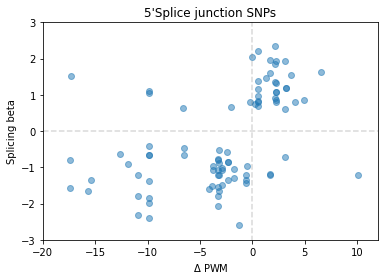

In [36]:
plt.plot([0, 0], [-5, 5], linestyle='--', alpha=0.3, c='gray')
plt.plot([-20, 20], [0, 0], linestyle='--', alpha=0.3, c='gray')
plt.scatter(mut_diff, beta, alpha = 0.5)
plt.xlabel(r'$\Delta$ PWM')
plt.ylabel('Splicing beta')
plt.title("5'Splice junction SNPs")
plt.xlim([-20, 12])
plt.ylim([-3, 3])

In [57]:
df = pd.read_csv('../../hyprcoloc_output_old/hyprcoloc_3ss.sorted.tab', sep='\t', names=['name', 'seq'])

df['seq'] = df['seq'].apply(Seq)

m  = motifs.create(df['seq'])
pwm = m.counts.normalize()
pssm = pwm.log_odds()

df['score'] = df['seq'].apply(pssm.calculate)


df_extended = pd.read_csv('../../hyprcoloc_output_old/hyprcoloc_3ss.extended.sorted.tab', sep='\t', names=['name', 'seq'])
df_extended['seq'] = df_extended['seq'].apply(Seq)

me  = motifs.create(df_extended['seq'])
pwme = me.counts.normalize()
pssme = pwme.log_odds()

# pssm.calculate(m.consensus)
df_extended['score'] = df_extended['seq'].apply(pssme.calculate)

df.index = [df.name[i].split('::')[0] for i in range(len(df.name))]
df_extended.index = [df_extended.name[i].split('::')[0] for i in range(len(df_extended.name))]

In [70]:
def mutate(seq, extended_seq, pos, snp, strand):
    
    
    chrom, position, original, new = snp.split(':')
    
    if strand == '-':
        seq = get_neg_nucleotide(seq)
        extended_seq = get_neg_nucleotide(extended_seq)
    
    if (len(original) == 1) and (len(new)==1):
        
        assert seq[pos] == original

        nuc = list(seq)
        nuc[pos] = new

        mutated_seq = ''.join(nuc)

        if strand == '-':
            mutated_seq = get_neg_nucleotide(mutated_seq)

        return mutated_seq
    
    else:
        
        if strand == '+':

            assert extended_seq[(pos+20):(pos+len(original)+20)] == original
            
            seq5 = extended_seq[:(pos+20)]
            seq3 = extended_seq[(pos+len(original)+20):]

            mutated_seq = seq5 + new + seq3
            mutated_seq = mutated_seq[20:28]
            
        else:
            
            assert extended_seq[(pos+21-len(original)):(pos+21)][::-1] == original
            
            seq5 = extended_seq[:(pos+21)][::-1]
            seq3 = extended_seq[(pos+21-len(original)):][::-1]
            
            mutated_seq = seq5 + new + seq3
            mutated_seq = get_neg_nucleotide(mutated_seq)[::-1][20:28]
        
        return mutated_seq
        
        
    
def get_neg_nucleotide(S):
    new_S = ''
    for i in range(len(S)):
        N = S[i]
        if N == 'A':
            new_S += 'T'
        elif N == 'T':
            new_S += 'A'
        elif N == 'G':
            new_S += 'C'
        elif N == 'C':
            new_S += 'G'
    return new_S#[::-1]
        

def get_splice_junctions(intron):
    chrom, start, end, clu = intron.split(';')[1].split(':')
    strand = clu.split('_')[-1]
    
    return int(start), int(end), strand


def isSNPin3SS(snp, intron, mut_diff):
    
    snp_pos = int(snp.split(':')[1])
    
    start, end, strand = get_splice_junctions(intron)
    
    seq = str(df.loc[intron].seq)
    extended_seq = str(df_extended.loc[intron].seq)
    
    for i in range(8):
        if strand == '+':
            test_pos = end + i - 6
        else:
            test_pos = start - i + 6
        
        if snp_pos == test_pos:
            mutated_seq = mutate(seq, extended_seq, i, snp, strand)
            
            mut_diff.append(np.max([pssm.calculate(Seq(mutated_seq)), -10]) - pssm.calculate(Seq(seq)))
            
            return mut_diff
    return mut_diff


def isClusterinSJ(data, snp_x, mut_diff, beta):
    snp_x_data = data.loc[data.snp_x == snp_x]
    
    token = False
    
    snps_sj_pr = []
    snps_no_sj_pr = []
    betas = []
    p = []
    
    for idx in snp_x_data.index:
        
        l = len(mut_diff)
        
        intron = snp_x_data.loc[idx, 'phenotype_full']
        snp_y = snp_x_data.loc[idx, 'snp_y']
        locus = snp_x_data.loc[idx, 'Locus']
        
        mut_diff = isSNPin3SS(snp_y, intron, mut_diff)
        
        if l < len(mut_diff):
            beta.append(snp_x_data.loc[idx, 'beta'])
            
    return mut_diff, beta
        
        

merged_splicing = merged_snps.loc[splicing_idx]

mut_diff = []
beta = []

for snp_x in tqdm(merged_splicing.snp_x.unique(), leave=True, position=0):
    
    mut_diff, beta = isClusterinSJ(merged_splicing, snp_x, mut_diff, beta)
    

100%|██████████| 727/727 [00:11<00:00, 63.66it/s] 


(-3.0, 3.0)

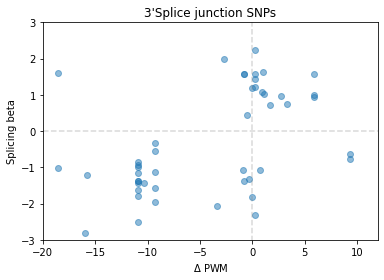

In [73]:
plt.plot([0, 0], [-5, 5], linestyle='--', alpha=0.3, c='gray')
plt.plot([-20, 20], [0, 0], linestyle='--', alpha=0.3, c='gray')
plt.scatter(mut_diff, beta, alpha = 0.5)
plt.xlabel(r'$\Delta$ PWM')
plt.ylabel('Splicing beta')
plt.title("3'Splice junction SNPs")
plt.xlim([-20, 12])
plt.ylim([-3, 3])

In [78]:
spearmanr(mut_diff, beta)

SpearmanrResult(correlation=0.4841384035276617, pvalue=0.000564699402360845)